# Guia 4

## Ejercicio 2

Implemente el método de clustering k-medias sobre el conjunto de datos Iris (GTP2) y compare las soluciones obtenidas con las de un SOM.  Para esto obtenga las matrices de contingencia entre ambos métodos y entre cada método y la clase de referencia.

Seleccione 2 dimensiones y grafique los datos coloreando cada punto según el grupo al que pertenece la solución de k-medias y en la del SOM.

Grafique las neuronas del SOM en 2D con una escala de colores según las frecuencias de activación para los datos de Iris. Indique además cuál es la clase de Iris de cada neurona.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from collections import Counter
import seaborn as sns
from Som import Som

#cargar dataset iris
data = load_iris()
x = data.data  
y = data.target

#k-means
kmeans = KMeans(n_clusters=3, random_state=42)

#som 10x10
som10 = Som(
    N=10,
    vecindades=[(5,5), (4,1), (0,0)],
    tasa_aprendizaje=[(0.9, 0.7), (0.7, 0.1), (0.1, 0.01)],
    epocas=[100, 200, 600]
)
_ = som10.entrenar(x)

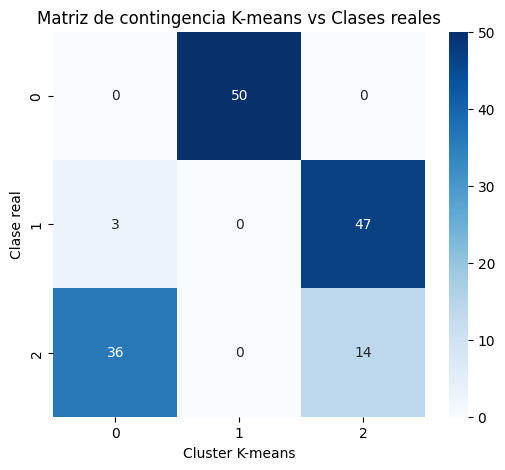

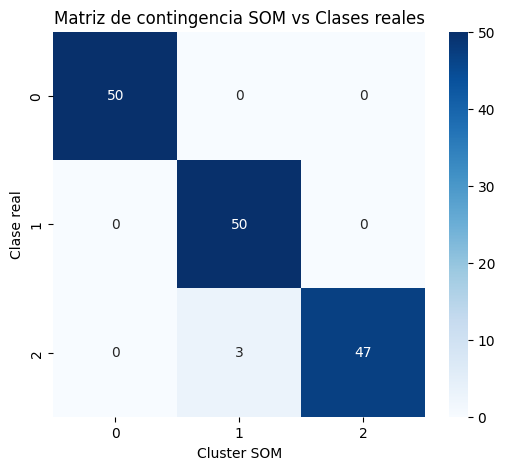

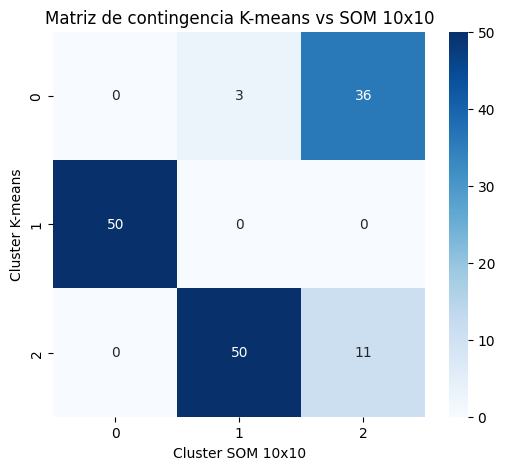

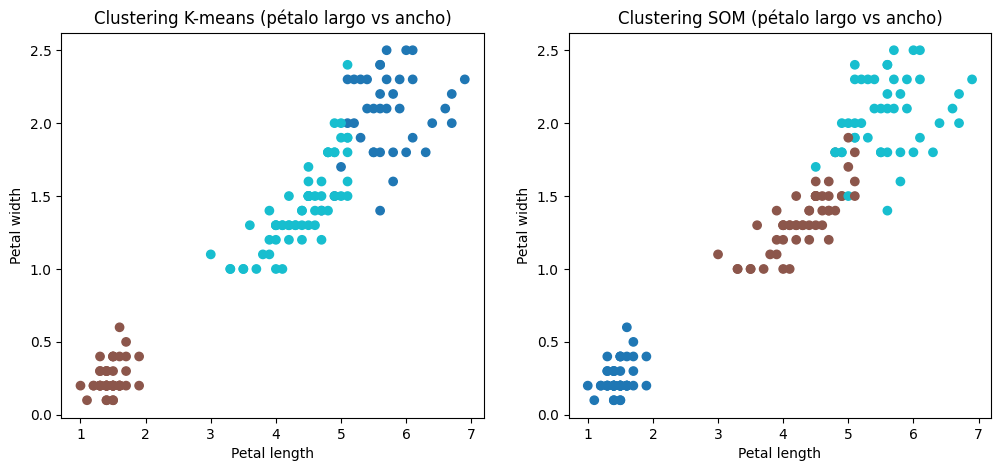

IndexError: arrays used as indices must be of integer (or boolean) type

In [2]:
# asignar cada punto a la neurona ganadora
y_kmeans = kmeans.fit_predict(x)
y_som10 = som10.predict(x)

#mapear coordenadas de neurona a un cluster
mapping = {}
for i in range(len(x)):
    key = tuple(y_som10[i])
    if key not in mapping:
        mapping[key] = []
    mapping[key].append(y[i])

#clase mayoritaria por neurona
neuron_labels = {k: Counter(v).most_common(1)[0][0] for k, v in mapping.items()}
y_som10_mapped = np.array([neuron_labels[tuple(winner)] for winner in y_som10])

#matrices de contingencia
cm_kmeans = confusion_matrix(y, y_kmeans)
plt.figure(figsize=(6,5))
sns.heatmap(cm_kmeans, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Cluster K-means")
plt.ylabel("Clase real")
plt.title("Matriz de contingencia K-means vs Clases reales")
plt.show()

cm_som10 = confusion_matrix(y, y_som10_mapped)  
plt.figure(figsize=(6,5))
sns.heatmap(cm_som10, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Cluster SOM")
plt.ylabel("Clase real")
plt.title("Matriz de contingencia SOM vs Clases reales")
plt.show()

cm_kmeans_som10 = confusion_matrix(y_kmeans, y_som10_mapped)
plt.figure(figsize=(6,5))
sns.heatmap(cm_kmeans_som10, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Cluster SOM 10x10")
plt.ylabel("Cluster K-means")
plt.title("Matriz de contingencia K-means vs SOM 10x10")
plt.show()


#visualización 2d
plt.figure(figsize=(12,5))

#k-means
plt.subplot(1,2,1)
plt.scatter(x[:,2], x[:,3], c=y_kmeans, cmap="tab10")
plt.title("Clustering K-means (pétalo largo vs ancho)")
plt.xlabel("Petal length")
plt.ylabel("Petal width")

#som
plt.subplot(1,2,2)
plt.scatter(x[:,2], x[:,3], c=y_som10_mapped, cmap="tab10")
plt.title("Clustering SOM (pétalo largo vs ancho)")
plt.xlabel("Petal length")
plt.ylabel("Petal width")

plt.show()

#frecuencia de activación de neuronas som
freq = np.zeros((som10.N,som10.N))
for i in y_som10:
    freq[i] += 1

plt.figure(figsize=(6,6))
plt.pcolor(freq, cmap="Blues")
plt.colorbar(label="Frecuencia de activación")
plt.title("Frecuencia de activación de neuronas (SOM)")
plt.show()


